# 0 Demonstrating some of the function calls we use during feature extraction 

A useful set of simple examples to show how to call the models and parse the data they return.

## 0.1 Demo data

Where will we find videos, images and audio for our examples? Two videos, the associate audio files and a set of images are available in the `data\demo` directory.

In [2]:
import os

demo_data = os.path.join("..","data", "demo")

# a couple of videos for testing
VIDEO_FILE = os.path.join(demo_data, "2UWdXP.joke1.rep2.take1.Peekaboo.mp4")
VIDEO_FILE2 = os.path.join(demo_data, "2UWdXP.joke2.rep1.take1.NomNomNom.mp4")

AUDIO_FILE = os.path.join(demo_data, "2UWdXP.joke1.rep2.take1.Peekaboo.mp3")
AUDIO_FILE2 = os.path.join(demo_data, "2UWdXP.joke2.rep1.take1.NomNomNom.mp3")

IMAGE1 = os.path.join(demo_data, "mother-and-baby.jpg")
IMAGE2 = os.path.join(demo_data, "peekaboo.png")
IMAGE3 = os.path.join(demo_data, "twopeople.jpg")

videoset = [VIDEO_FILE, VIDEO_FILE2]
audioset = [AUDIO_FILE, AUDIO_FILE2]
photoset = [IMAGE1, IMAGE2, IMAGE3]

## 0.1 YOLOv8

Go to [docs.ultralytics.com](https://docs.ultralytics.com/) for detailed documentation and lots of examples. We just demo a few here.


In [2]:
import cv2
import json
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import calcs  # local calcs.py contains some helper functions
import utils  # local utils.py contains some helper functions
import display  # local display.py contains display helper functions

### 0.1.1 Pose estimation

In [8]:
# use a yolo model with pose estimation
model = YOLO("yolov8n-pose.pt")

# the results will contain object detection and pose estimation data.
results = model(IMAGE3)
print(results)


image 1/1 c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\twopeople.jpg: 448x640 2 persons, 26.3ms
Speed: 2.0ms preprocess, 26.3ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [241, 237, 236],
        [241, 237, 236],
        [241, 237, 236]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [241, 237, 236],
        [241, 237, 236],
        [241, 237, 236]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [241, 237, 236],
        [241, 237, 236],
        [241, 237, 236]],

       ...,

       [[126, 133, 136],
        [127, 134, 137],
        [127, 13

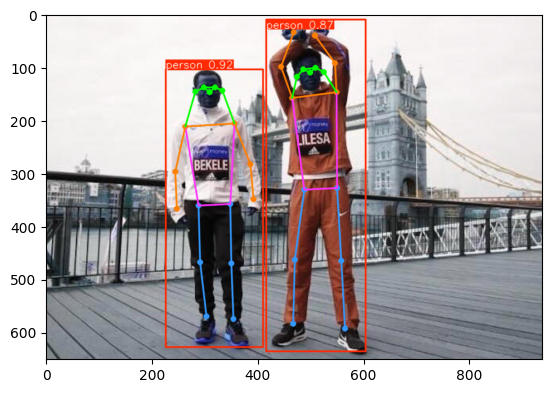

[[[     309.76      147.44]
  [     319.51      138.03]
  [     298.74      138.75]
  [     333.81      144.31]
  [     282.27      146.63]
  [     356.89       206.9]
  [     263.73       212.8]
  [      386.5      283.64]
  [     244.98      297.84]
  [     392.56      349.91]
  [     247.85      367.22]
  [     348.61      358.84]
  [     288.82      361.12]
  [     350.77      470.76]
  [     291.12      468.98]
  [      354.6      575.16]
  [     303.53      570.97]]

 [[     499.67      110.29]
  [     509.27      101.52]
  [      486.8      104.78]
  [     525.17      109.19]
  [     474.28      118.13]
  [     549.22      147.39]
  [     465.17      158.22]
  [     546.91      92.659]
  [     444.56      99.364]
  [     508.26      40.892]
  [     468.33      34.489]
  [     550.81      328.05]
  [     488.78       331.7]
  [     558.06      465.14]
  [     470.75      463.25]
  [     565.13      593.19]
  [     467.59      584.03]]]
[[    0.98947     0.95855     0.96956     0.

In [10]:
# automatically display image overlayed with keypoints, skeleton and bounding boxes
labelledimage = results[0].plot()
plt.imshow(labelledimage)
plt.show()

# get the keypoints as a numpy arrays of x,y coordinates each with a confidence score.
# note yolo returns tensors so we have to convert to numpy
keypoints = results[0].keypoints.cpu().numpy()
print(keypoints.xy)
print(keypoints.conf)
print(keypoints.data)

In [11]:
# yolo returns keypoints as a 3 x 17 tensor of x,y,confidence, we typically flatten it to a 51 element list to store in dataframes
xyc = keypoints.data[0].flatten().tolist()
print(xyc)

[309.76446533203125, 147.44113159179688, 0.9894695281982422, 319.51177978515625, 138.02674865722656, 0.958551824092865, 298.7419128417969, 138.75228881835938, 0.9695618152618408, 333.8133239746094, 144.30694580078125, 0.7805278897285461, 282.2679138183594, 146.63265991210938, 0.8468091487884521, 356.88751220703125, 206.89891052246094, 0.996717631816864, 263.72869873046875, 212.79623413085938, 0.9981535077095032, 386.5010986328125, 283.6438903808594, 0.9809609651565552, 244.98011779785156, 297.8372497558594, 0.9903420209884644, 392.5637512207031, 349.91290283203125, 0.9685062170028687, 247.8511199951172, 367.218994140625, 0.9810907244682312, 348.6077880859375, 358.84136962890625, 0.9991661310195923, 288.8248596191406, 361.1241760253906, 0.999357283115387, 350.77386474609375, 470.7572937011719, 0.9979128241539001, 291.119384765625, 468.9759826660156, 0.9985093474388123, 354.6002197265625, 575.1646118164062, 0.9864953756332397, 303.5281066894531, 570.9739379882812, 0.9896251559257507]


# 0.1.2 YOLOv8 video -> keypoints dataframe

If we pass model a video rather than image, the results object must be iterated over to get the results for each frame.

We extract movement and save it to dataframe using our own helper functions: 

* `utils.createKeypointsDF` - initialise an empty keypoints dataframe
* `utils.addKeypointsToDF` - adds keypoints to dataframe
* `utils.videotodf` - extracts keypoints from video and saves to dataframe



In [12]:
results = model(VIDEO_FILE, stream=True)
df = utils.createKeypointsDF()
frame = 0
for r in results:
    # print(torch.flatten(r.keypoints.xy[0]).tolist())
    df = utils.addKeypointsToDF(df, frame, r.boxes.xywh, r.boxes.conf, r.keypoints.data)
    frame += 1

print(f"Video {VIDEO_FILE} has {frame} frames and {len(df)} rows of data")
df.head()


video 1/1 (frame 1/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 50.1ms
video 1/1 (frame 2/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 49.0ms
video 1/1 (frame 3/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 46.0ms
video 1/1 (frame 4/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 45.7ms
video 1/1 (frame 5/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 6.0ms
video 1/1 (frame 6/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 6.0ms
video 1/1 (frame 7/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take

frame person  index  bbox.x1  bbox.y1  bbox.x2  bbox.y2    bbox.c  \
0      0  child      0    373.0     64.0    640.0    480.0  0.814496   
1      0  adult      1      0.0    315.0    460.0    480.0  0.522834   
2      1  child      0    384.0     63.0    640.0    480.0  0.846705   
3      1  adult      1      0.0    315.0    456.0    480.0  0.569620   
4      2  child      0    394.0     60.0    640.0    480.0  0.762082   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992188  320.262817  ...     0.002259           0.0           0.0   
1  348.465393  456.628021  ...     0.038360           0.0           0.0   
2  429.151001  315.061890  ...     0.001489           0.0           0.0   
3  364.958313  480.000000  ...     0.043197           0.0           0.0   
4  447.805695  312.517822  ...     0.001132           0.0           0.0   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121           0.0           0.0      0.002614            0.0   
1      0.066367           0.0           0.0      0.055381            0.0   
2      0.005873           0.0           0.0      0.002503            0.0   
3      0.067392           0.0           0.0      0.073379            0.0   
4      0.004892           0.0           0.0      0.001508            0.0   

   right_ankle.y  right_ankle.c  
0            0.0       0.006508  
1            0.0       0.073323  
2            0.0       0.008185  
3            0.0       0.085528  
4            0.0       0.005159  

[5 rows x 59 columns]

Our keypoints dataframe has the following structure

![keypoints dataframe](../docs/keypointsdf.png)

For each video `frame`, we have one row person `person` and `index`. The next five columns describe the bounding box for that person marked by it's top left `(x1,y1)` and bottom right `(x2,y2)` corners. This is followed 51 columns representing 17 COCO pose points each labelled with `(x,y)` coordinate and a confidence `c` between (0,1).

In [13]:
df = utils.videotokeypoints(model, VIDEO_FILE, track=False)
df.head()


video 1/1 (frame 1/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 59.4ms
video 1/1 (frame 2/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 53.0ms
video 1/1 (frame 3/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 50.0ms
video 1/1 (frame 4/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 21.5ms
video 1/1 (frame 5/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 5.0ms
video 1/1 (frame 6/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 5.6ms
video 1/1 (frame 7/217) c:\Users\caspar\OneDrive\LegoGPI\babyjokes\code\..\data\demo\2UWdXP.joke1.rep2.take

frame person  index  bbox.x1  bbox.y1  bbox.x2  bbox.y2    bbox.c  \
0      0  child      0    373.0     64.0    640.0    480.0  0.814496   
1      0  adult      1      0.0    315.0    460.0    480.0  0.522834   
2      1  child      0    384.0     63.0    640.0    480.0  0.846705   
3      1  adult      1      0.0    315.0    456.0    480.0  0.569620   
4      2  child      0    394.0     60.0    640.0    480.0  0.762082   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992188  320.262817  ...     0.002259           0.0           0.0   
1  348.465393  456.628021  ...     0.038360           0.0           0.0   
2  429.151001  315.061890  ...     0.001489           0.0           0.0   
3  364.958313  480.000000  ...     0.043197           0.0           0.0   
4  447.805695  312.517822  ...     0.001132           0.0           0.0   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121           0.0           0.0      0.002614            0.0   
1      0.066367           0.0           0.0      0.055381            0.0   
2      0.005873           0.0           0.0      0.002503            0.0   
3      0.067392           0.0           0.0      0.073379            0.0   
4      0.004892           0.0           0.0      0.001508            0.0   

   right_ankle.y  right_ankle.c  
0            0.0       0.006508  
1            0.0       0.073323  
2            0.0       0.008185  
3            0.0       0.085528  
4            0.0       0.005159  

[5 rows x 59 columns]

In [14]:
stemname = os.path.splitext(VIDEO_FILE)[0]
csvpath = stemname + ".csv"
df.to_csv(csvpath, index=False)

df = pd.read_csv(csvpath, index_col=None)
df.head()

frame person  index  bbox.x1  bbox.y1  bbox.x2  bbox.y2    bbox.c  \
0      0  child      0    373.0     64.0    640.0    480.0  0.814496   
1      0  adult      1      0.0    315.0    460.0    480.0  0.522834   
2      1  child      0    384.0     63.0    640.0    480.0  0.846705   
3      1  adult      1      0.0    315.0    456.0    480.0  0.569620   
4      2  child      0    394.0     60.0    640.0    480.0  0.762082   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992188  320.262817  ...     0.002259           0.0           0.0   
1  348.465393  456.628021  ...     0.038360           0.0           0.0   
2  429.151001  315.061890  ...     0.001489           0.0           0.0   
3  364.958313  480.000000  ...     0.043197           0.0           0.0   
4  447.805695  312.517822  ...     0.001132           0.0           0.0   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121           0.0           0.0      0.002614            0.0   
1      0.066367           0.0           0.0      0.055381            0.0   
2      0.005873           0.0           0.0      0.002503            0.0   
3      0.067392           0.0           0.0      0.073379            0.0   
4      0.004892           0.0           0.0      0.001508            0.0   

   right_ankle.y  right_ankle.c  
0            0.0       0.006508  
1            0.0       0.073323  
2            0.0       0.008185  
3            0.0       0.085528  
4            0.0       0.005159  

[5 rows x 59 columns]

## Displaying data 

Two functions help display keypoint and other data overlayed on frame. 

* `utils.getFrameKpts` takes keypoints dataframe and framenumber and returns list of all bounding boxes, their labels and corresponding keypoints.
* `display.drawOneFrame` takes thes outputs and draws them on the frame.

['child: 0', 'adult: 1']
[[        261         111         639         480]
 [          6         263         363         480]]
[[     452.12      358.17     0.97083      461.82      323.17     0.98749           0           0     0.33995      557.38      276.71     0.97362           0           0   0.0037883           0           0     0.39056      580.72      366.09      0.8151           0           0    0.035701           0           0
      0.43971           0           0     0.22617      301.36       444.3     0.70832           0           0   0.0015878           0           0   0.0095213           0           0   0.0010154           0           0    0.005636           0           0  0.00086244           0           0   0.0037376]
 [      280.5      427.75     0.85911           0           0     0.10537      272.86      404.38      0.9816           0           0   0.0021173       194.1      380.91     0.98797           0           0       0.465           0           0     0.38666  

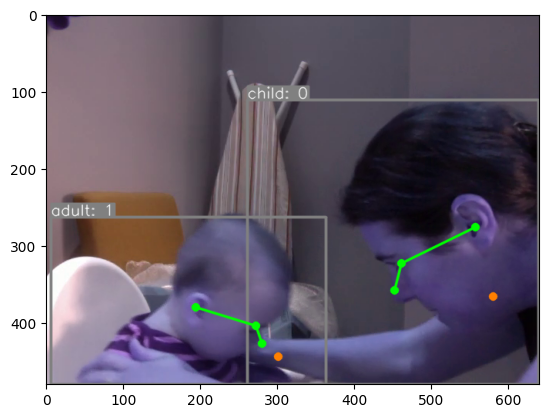

In [15]:
framenumber = 34
bboxlabels, bboxes, xycs = utils.getFrameKpts(df, framenumber)

print(bboxlabels)
print(bboxes)
print(xycs)

video = cv2.VideoCapture(VIDEO_FILE)
video.set(cv2.CAP_PROP_POS_FRAMES, framenumber)
success, image = video.read()
video.release()

image = display.drawOneFrame(image, bboxlabels, bboxes, xycs)

plt.imshow(image)

## 0.1.2 model.track()

YoloV8 also comes with a `model.track` method. This aims to keep track of all identified people (and other objects?) over the course of a video. 

This is pretty easy instead of calling 
`results = model(video_path, stream=True)`

we can call
`results = model.track(video_path, stream=True)`

https://docs.ultralytics.com/modes/track/#persisting-tracks-loop

Here's an inline example of it working..

In [16]:
# Open the video file
video_path = VIDEO_FILE
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ---------------------------------------- 1.5/1.5 MB 11.0 MB/s eta 0:00:00

requirements: AutoUpdate success  1.7s, installed 1 package: ['lapx>=0.5.2']
requirements:  Restart runtime or rerun command for updates to take effect


0: 480x640 1 person, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.0ms
Speed: 0.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 6.0ms
Speed: 1.0ms preprocess, 6.0ms 

# 0.2 Extracting Speech

We extract the audio and then use off the shelf speech recognition to extract the text.

### 0.2.1 Extracting audio with moviepy

MoviePy is basic movie editing tool that wraps ffmpeg and allows us to extract audio from video.


In [17]:
import moviepy.editor as mp

video_path = VIDEO_FILE
output_ext = "mp3"
output_ext = "wav"

filename = os.path.splitext(video_path)[0]
clip = mp.VideoFileClip(video_path)
audio_file = os.path.join(f"{filename}.{output_ext}")
clip.audio.write_audiofile(audio_file)
clip.close()

MoviePy - Writing audio in ..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.wav


MoviePy - Done.


In [18]:
# playback the audio file
from IPython.display import Audio

Audio(audio_file)

# 0.7 visualising data over time

some of the calculations to help us visualise the movement of participants over time. 


In [19]:
# function that calculates the average x and y coordinates of a set of keypoints (where confidence score is above a threshold)
xycs = np.array(
    [
        [1, 2, 0.9],
        [2, 3, 0.8],
        [3, 4, 0.7],
        [4, 5, 0.6],
        [5, 6, 0.5],
        [6, 7, 0.4],
        [7, 8, 0.3],
        [8, 9, 0.2],
        [9, 10, 0.1],
    ]
)

avgx, avgy = calcs.avgxys(xycs, threshold=0.5)

print(avgx, avgy)

2.5 3.5


# 0.8 Adding annotations to the videos

In [20]:
videos_in = r"..\LookitLaughter.test"
metadata_file = "_LookitLaughter.xlsx"
data_out = r"..\data\1_interim"
videos_out = r"..\data\2_final"
temp_out = r"..\data\0_temp"

# a couple of files for testing
VIDEO_FILE = os.path.join(videos_in, "2UWdXP.joke1.rep2.take1.Peekaboo.mp4")
VIDEO_FILE2 = os.path.join(videos_in, "2UWdXP.joke2.rep1.take1.NomNomNom.mp4")
AUDIO_FILE = os.path.join(data_out, "2UWdXP.joke1.rep2.take1.Peekaboo.wav")
AUDIO_FILE2 = os.path.join(data_out, "2UWdXP.joke2.rep1.take1.NomNomNom.wav")
SPEECH_FILE = os.path.join(data_out, "2UWdXP.joke1.rep2.take1.Peekaboo.json")
SPEECH_FILE2 = os.path.join(data_out, "2UWdXP.joke2.rep1.take1.NomNomNom.json")

testset = [VIDEO_FILE, VIDEO_FILE2]

In [22]:
processedvideos = utils.getProcessedVideos(data_out)
processedvideos.head()

Found existing processedvideos.xlsx with 54 rows.


VideoID ChildID   JokeType  Joke.Label  \
0   2UWdXP.joke1.rep2.take1.Peekaboo.mp4  2UWdXP   Peekaboo           2   
1   2UWdXP.joke1.rep3.take1.Peekaboo.mp4  2UWdXP   Peekaboo           2   
2  2UWdXP.joke2.rep1.take1.NomNomNom.mp4  2UWdXP  NomNomNom           1   
3  2UWdXP.joke2.rep2.take1.NomNomNom.mp4  2UWdXP  NomNomNom           1   
4  2UWdXP.joke2.rep3.take1.NomNomNom.mp4  2UWdXP  NomNomNom           1   

   JokeNum  JokeRep  JokeTake        HowFunny LaughYesNo  Frames  ...  \
0        1        2         1  Slightly funny         No     217  ...   
1        1        3         1  Slightly funny         No     152  ...   
2        2        1         1           Funny         No      95  ...   
3        2        2         1  Slightly funny         No      97  ...   
4        2        3         1  Slightly funny         No     133  ...   

                                         Speech.file          Speech.when  \
0  ../data/1_interim/2UWdXP.joke1.rep2.take1.Peek...  2023-09-20 16:58:38   
1  ../data/1_interim/2UWdXP.joke1.rep3.take1.Peek...  2023-09-20 16:58:39   
2  ../data/1_interim/2UWdXP.joke2.rep1.take1.NomN...  2023-09-20 16:58:40   
3  ../data/1_interim/2UWdXP.joke2.rep2.take1.NomN...  2023-09-20 16:58:40   
4  ../data/1_interim/2UWdXP.joke2.rep3.take1.NomN...  2023-09-20 16:58:48   

   Objects.file  Objects.when Understand.file Understand.when  \
0           NaN           NaN             NaN             NaN   
1           NaN           NaN             NaN             NaN   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4           NaN           NaN             NaN             NaN   

                                        Faces.normed  \
0  ../data/1_interim/2UWdXP.joke1.rep2.take1.Peek...   
1  ../data/1_interim/2UWdXP.joke1.rep3.take1.Peek...   
2  ../data/1_interim/2UWdXP.joke2.rep1.take1.NomN...   
3  ../data/1_interim/2UWdXP.joke2.rep2.take1.NomN...   
4  ../data/1_interim/2UWdXP.joke2.rep3.take1.NomN...   

                                    Keypoints.normed  \
0  ../data/1_interim/2UWdXP.joke1.rep2.take1.Peek...   
1  ../data/1_interim/2UWdXP.joke1.rep3.take1.Peek...   
2  ../data/1_interim/2UWdXP.joke2.rep1.take1.NomN...   
3  ../data/1_interim/2UWdXP.joke2.rep2.take1.NomN...   
4  ../data/1_interim/2UWdXP.joke2.rep3.take1.NomN...   

                                      annotatedVideo       annotated.when  
0  ../data/2_final/2UWdXP.joke1.rep2.take1.Peekab...  2024-02-16 11:03:50  
1  ../data/2_final/2UWdXP.joke1.rep3.take1.Peekab...  2024-02-16 11:03:51  
2  ../data/2_final/2UWdXP.joke2.rep1.take1.NomNom...  2024-02-16 11:03:52  
3  ../data/2_final/2UWdXP.joke2.rep2.take1.NomNom...  2024-02-16 11:03:53  
4  ../data/2_final/2UWdXP.joke2.rep3.take1.NomNom...  2024-02-16 11:03:54  

[5 rows x 31 columns]

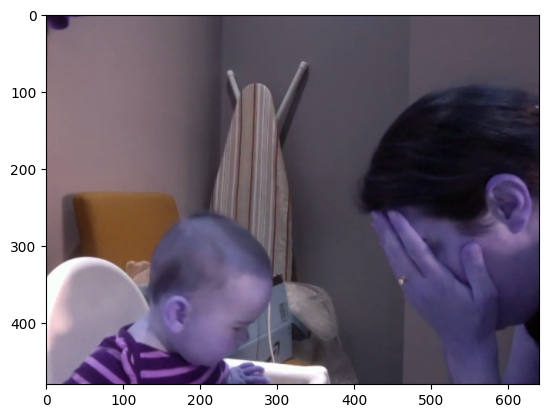

We have a keypoints file for 2UWdXP.joke1.rep2.take1.Peekaboo.mp4


frame person  index     bbox.x1    bbox.y1     bbox.x2  bbox.y2    bbox.c  \
0      0  child      0  373.000000  64.000000  640.000000    480.0  0.814496   
1      1  child      0  382.648010  63.061234  640.000000    480.0  0.846705   
2      2  child      0  392.259277  60.749390  639.949341    480.0  0.762082   
3      3  child      0  395.546387  57.723068  639.838013    480.0  0.519463   
4      4  child      0  209.218323  55.281082  640.000000    480.0  0.597568   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992188  320.262787  ...     0.002259    531.112488    376.236572   
1  429.151062  315.061920  ...     0.001489    542.338257    366.595001   
2  447.805542  312.517822  ...     0.001132    575.497437    417.850220   
3  451.206238  312.775391  ...     0.002987    540.925537    431.976471   
4  455.920197  313.505096  ...     0.002831    412.489899    410.772247   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121    533.869812    411.200470      0.002614     526.426941   
1      0.005873    533.722168    407.547699      0.002503     525.947205   
2      0.004892    517.922913    441.914154      0.001508     559.945923   
3      0.003907    500.927673    427.211487      0.002987     483.234283   
4      0.005747    334.505920    433.655823      0.005509     327.953430   

   right_ankle.y  right_ankle.c  
0     364.012299       0.006508  
1     363.911499       0.008185  
2     381.484741       0.005159  
3     387.557556       0.004137  
4     408.523560       0.010319  

[5 rows x 59 columns]

In [23]:
# let's grab a single frame from the video

framenum = 60
video = cv2.VideoCapture(VIDEO_FILE)
video.set(cv2.CAP_PROP_POS_FRAMES, framenum)
ret, frame = video.read()
video.release()

if ret:
    plt.imshow(frame)
    plt.show()

videoname = os.path.basename(VIDEO_FILE)

kpts = utils.getKeyPoints(processedvideos, videoname)
kpts.head()

## 0.8.7 Add annotations onto a video.



In [24]:
# let's grab a single frame from the video
bboxlabels, bboxes, xycs = utils.getFrameKpts(kpts, framenum)
print(bboxlabels)
print(bboxes)
print(xycs)

['child: 0', 'adult: 1']
[[     410.55      77.825      639.89         480]
 [     1.1154      256.04      318.19         480]]
[[     529.27      339.45    0.092043      518.08       308.4     0.14817      536.61      315.69   0.0045803      558.98      271.93     0.50191      605.92       292.5   0.0056408      634.19      403.83      0.1052         640      367.76     0.15251      630.99         480     0.01702      608.99      431.17
     0.060698      552.77      422.92     0.12126      555.71      429.57      0.2723      605.46      415.49   0.0007824         640      385.57   0.0017054      581.55      336.73   0.0059873      626.92      287.06    0.016609      555.77       407.8   0.0086202       529.5      356.36    0.022016]
 [     259.69      422.65     0.83213       260.8      402.65     0.18483      248.23      401.78     0.96207      226.01      388.95   0.0031448      178.66      385.55     0.98566      178.74      439.61     0.77217      78.996      462.27     0.55881  

480 640


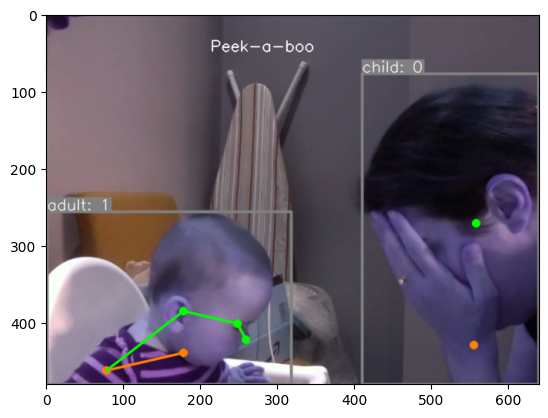

In [25]:
h, w = frame.shape[:2]
print(h, w)

frame = display.drawOneFrame(frame, bboxlabels, bboxes, xycs, "Peek-a-boo")

plt.imshow(frame)
plt.show()

In [26]:
# check captions for this video at
with open(SPEECH_FILE) as f:
    speechjson = json.load(f)
caption = display.WhisperExtractCurrentCaption(speechjson, framenum, 15)
print(caption)

 Hey, excuse me. Look.


In [27]:
# let's get all the annotations for this video
kpts = utils.getKeyPoints(processedvideos, videoname)
facedata = utils.getFaceData(processedvideos, videoname)
speechdata = utils.getSpeechData(processedvideos, videoname)

We have a keypoints file for 2UWdXP.joke1.rep2.take1.Peekaboo.mp4
We have a face data file for 2UWdXP.joke1.rep2.take1.Peekaboo.mp4
We have a speech data file for 2UWdXP.joke1.rep2.take1.Peekaboo.mp4


In this demo, the extract movement algorithm has mislabelled the adult and the child (the labels get applied at random). We need to swap the labels around.

In [28]:
kpts = utils.relabelPersonIndex(
    kpts, person="child", index=0, newPerson="temp", newIndex=100
)
kpts = utils.relabelPersonIndex(
    kpts, person="adult", index=1, newPerson="child", newIndex=0
)
kpts = utils.relabelPersonIndex(
    kpts, person="temp", index=100, newPerson="adult", newIndex=1
)

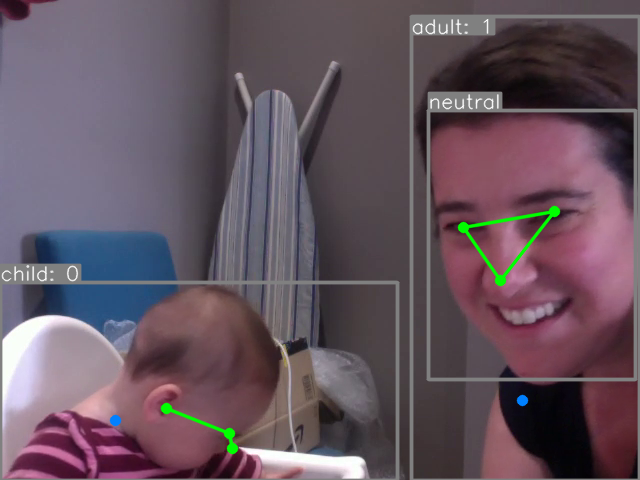

Number of frames: 216


In [29]:
annotatedVideo = display.createAnnotatedVideo(
    VIDEO_FILE, kpts, facedata, speechdata, temp_out, True
)

In [30]:
# Add the audio file back onto the annotated video
# annotatedVideo = r"..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated.mp4"

from moviepy.editor import *

videoclip = VideoFileClip(annotatedVideo)
audioclip = AudioFileClip(AUDIO_FILE)

videoclip = videoclip.set_audio(audioclip)

In [31]:
audioclip.ipython_display()

MoviePy - Writing audio in __temp__.mp3


MoviePy - Done.


In [32]:
videoclip.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [33]:
# note need to save with a different name as the original video is still open
videoclip.write_videofile(
    r"..\data\0_temp\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4"
)

Moviepy - Building video ..\data\0_temp\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4.
MoviePy - Writing audio in 2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ..\data\0_temp\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4



Moviepy - Done !
Moviepy - video ready ..\data\0_temp\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4


# 0.9 Diarization with pyannote

We can use pyannote to diarize the audio and then use the results to extract the speech from the audio.

The code is in our utils.py file.

Diarizing audio file: ..\data\demo\2UWdXP.joke1.rep2.take1.Peekaboo.mp3
[ 00:00:00.030 -->  00:00:00.250] A SPEAKER_03
[ 00:00:02.174 -->  00:00:02.747] B SPEAKER_02
[ 00:00:05.650 -->  00:00:05.852] C SPEAKER_02
[ 00:00:05.852 -->  00:00:06.021] D SPEAKER_01
[ 00:00:06.021 -->  00:00:06.055] E SPEAKER_02
[ 00:00:07.304 -->  00:00:07.405] F SPEAKER_00
[ 00:00:08.687 -->  00:00:09.244] G SPEAKER_01
[ 00:00:12.180 -->  00:00:12.771] H SPEAKER_01


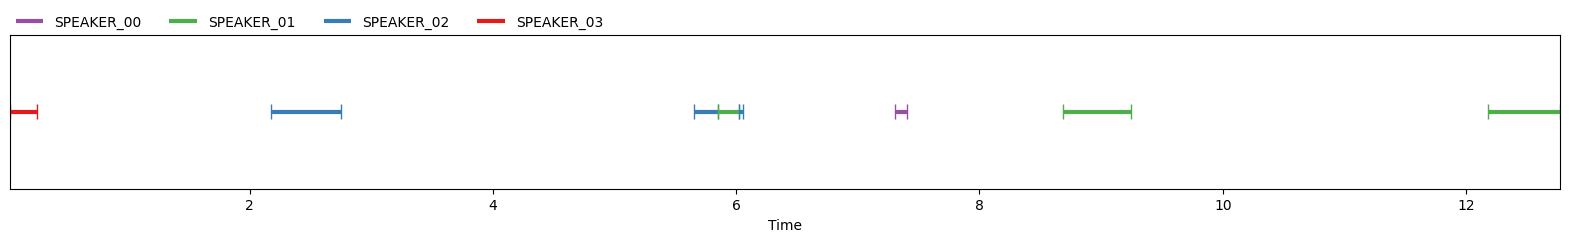

In [6]:
import utils

diarization = utils.diarize_audio(AUDIO_FILE)

with open("output.rttm", "w") as rttm:
    diarization.write_rttm(rttm)

print(diarization)  # diarizaation as values

diarization # as visual timeline

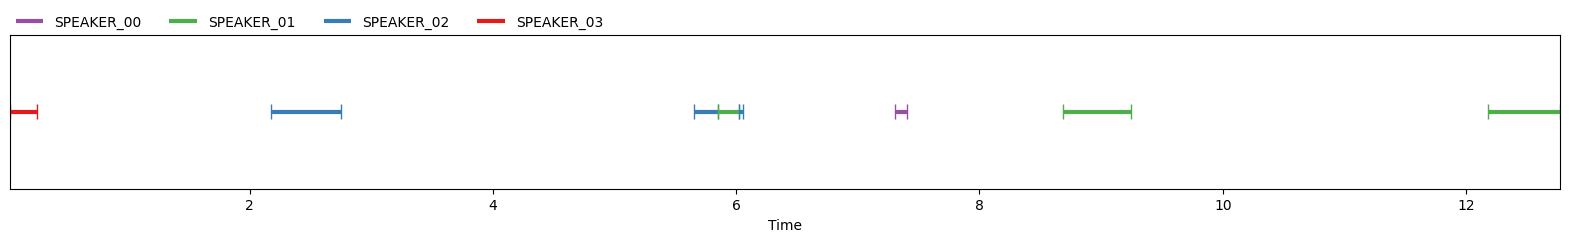

In [7]:
# Load the diarization output from the RTTM file
_, diary = load_rttm("output.rttm").popitem()

diary